In [1]:
import os
import glob
import json
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from cv2 import CascadeClassifier
from tqdm import tqdm

TRAIN_DIR = 'train_sample_videos/'

BATCH_SIZE = 1
N_FRAMES = 5

import mtcnn
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [2]:
# Source: https://www.kaggle.com/timesler/facial-recognition-model-in-pytorch
class DetectionPipeline:
    """Pipeline class for detecting faces in the frames of a video file."""
    
    def __init__(self, detector, n_frames=None, batch_size=60, resize=None):
        """Constructor for DetectionPipeline class.
        
        Keyword Arguments:
            n_frames {int} -- Total number of frames to load. These will be evenly spaced
                throughout the video. If not specified (i.e., None), all frames will be loaded.
                (default: {None})
            batch_size {int} -- Batch size to use with MTCNN face detector. (default: {32})
            resize {float} -- Fraction by which to resize frames from original prior to face
                detection. A value less than 1 results in downsampling and a value greater than
                1 result in upsampling. (default: {None})
        """
        self.detector = detector
        self.n_frames = n_frames
        self.batch_size = batch_size
        self.resize = resize
    
    def __call__(self, filename):
        """Load frames from an MP4 video and detect faces.

        Arguments:
            filename {str} -- Path to video.
        """
        # Create video reader and find length
        v_cap = cv2.VideoCapture(filename)
        v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Pick 'n_frames' evenly spaced frames to sample
        if self.n_frames is None:
            sample = np.arange(0, v_len)
        else:
            sample = np.linspace(0, v_len - 1, self.n_frames).astype(int)
        print(v_len)
        # Loop through frames
        faces = []
        frames = []
        for j in range(v_len):
            success = v_cap.grab()
            if j in sample:
                # Load frame
                success, frame = v_cap.retrieve()
                if not success:
                    continue
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frames.append(frame)              

                # When batch is full, detect faces and reset frame list
                for frame in frames:
                    face = []
                    face.extend(self.detector.detect_faces(frame))
                    print('number of face %d in a frame'%(len(face)))
                    resized_faces = self.draw_faces(frame, face)
                    faces.extend(resized_faces)
                frames = []
        v_cap.release()
        return faces
    
    def draw_faces(self, image, result_list):
    # load the image
        #data = plt.imread(filename)
        # plot each face as a subplot
        faces = []
        for i in range(len(result_list)):
            # get coordinates
            x1, y1, width, height = result_list[i]['box']
            x2, y2 = x1 + width, y1 + height
            plt.subplot(1, len(result_list), i+1)
            plt.axis('off')
            face = image[y1:y2, x1:x2]
            face = cv2.resize(face, (299,299))
            faces.append(face)
        return faces

In [3]:
# Load face detector
face_detector = MTCNN()


# Define face detection pipeline
detection_pipeline = DetectionPipeline(detector=face_detector, n_frames=N_FRAMES, batch_size=BATCH_SIZE)

In [4]:
# Get the paths of all train videos
all_train_videos = glob.glob(os.path.join(TRAIN_DIR, '*.mp4'))

# Get path of metadata.json
metadata_path = TRAIN_DIR + 'metadata.json'

# Get metadata
with open(metadata_path, 'r') as f:
    metadata = json.load(f)
df = pd.DataFrame(columns=['filename', 'distance', 'label'])

  0%|          | 0/400 [00:00<?, ?it/s]

train_sample_videos/aagfhgtpmv.mp4
aagfhgtpmv.mp4
300
1
number of face 1 in a frame
1
1
number of face 1 in a frame
2


/home/prithvi/anaconda2/lib/python3.6/site-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


1
number of face 1 in a frame
3
1
number of face 1 in a frame
4
1
number of face 1 in a frame
5


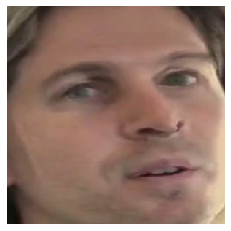

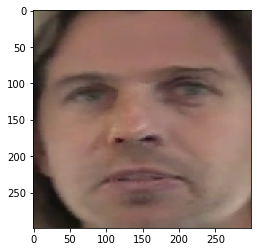

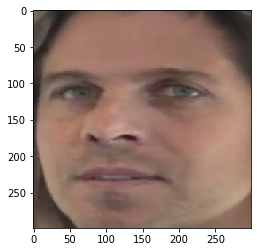

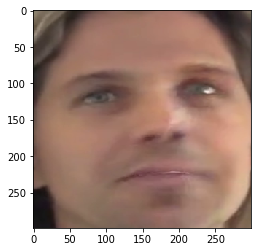

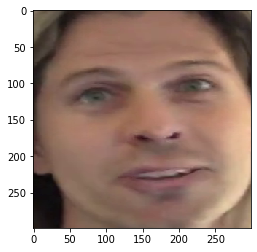

  0%|          | 1/400 [00:06<43:44,  6.58s/it]

train_sample_videos/aapnvogymq.mp4
aapnvogymq.mp4
300
1
number of face 2 in a frame
2
1
number of face 2 in a frame
4
1
number of face 2 in a frame
6
1
number of face 2 in a frame
8
1
number of face 2 in a frame
10


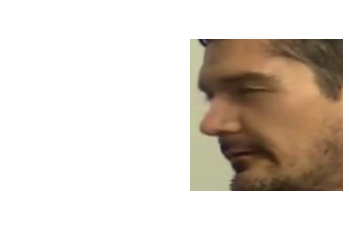

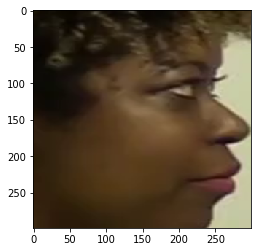

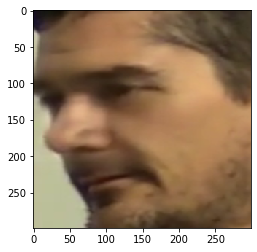

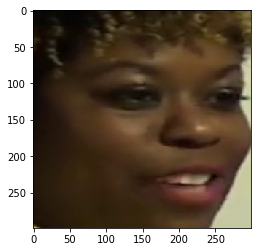

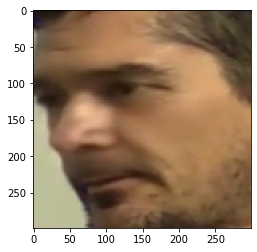

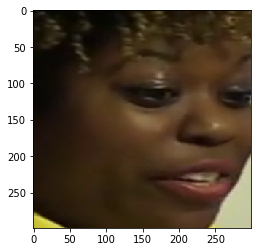

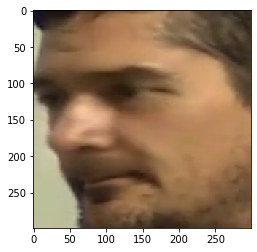

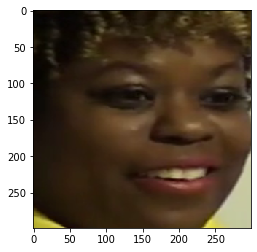

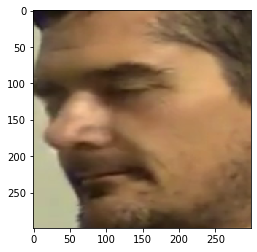

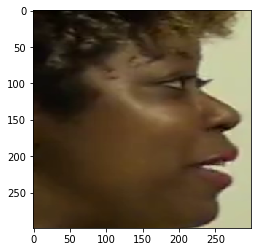

  0%|          | 2/400 [00:13<45:10,  6.81s/it]

train_sample_videos/abarnvbtwb.mp4
abarnvbtwb.mp4
300
1
number of face 1 in a frame
1
1
number of face 1 in a frame
2
1
number of face 1 in a frame
3
1
number of face 1 in a frame
4
1
number of face 1 in a frame
5


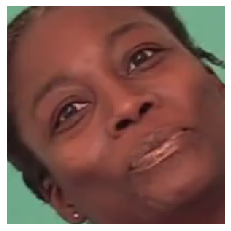

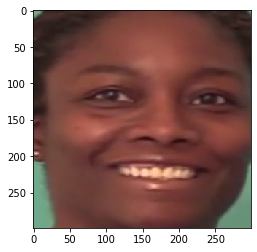

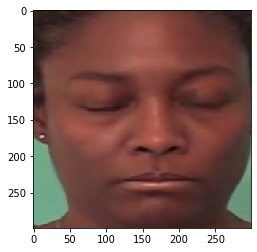

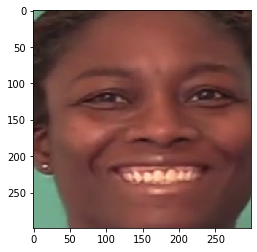

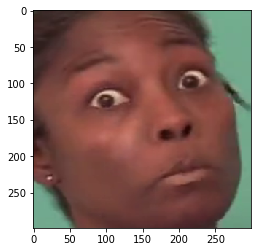

  1%|          | 3/400 [00:19<43:34,  6.59s/it]

train_sample_videos/abofeumbvv.mp4
abofeumbvv.mp4
300
1
number of face 0 in a frame
0
1
number of face 1 in a frame
1
1
number of face 1 in a frame
2
1
number of face 1 in a frame
3
1
number of face 1 in a frame
4


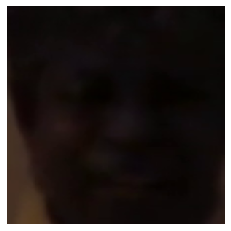

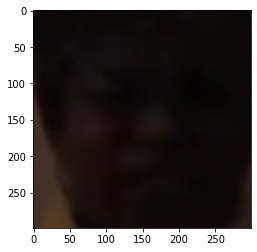

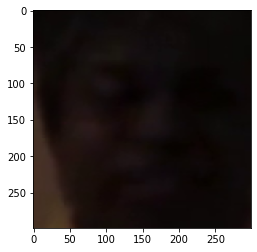

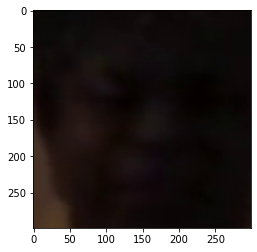

  1%|          | 4/400 [00:24<39:38,  6.01s/it]

train_sample_videos/abqwwspghj.mp4
abqwwspghj.mp4
300
1
number of face 2 in a frame
2
1
number of face 1 in a frame
3
1
number of face 1 in a frame
4
1
number of face 1 in a frame
5
1
number of face 1 in a frame
6


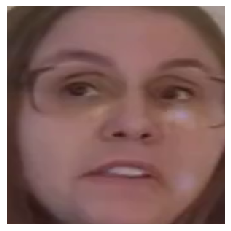

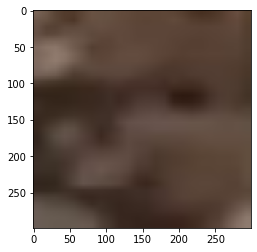

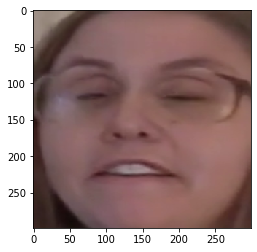

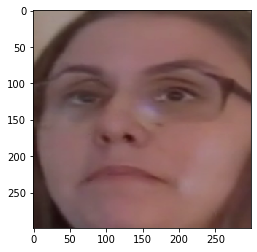

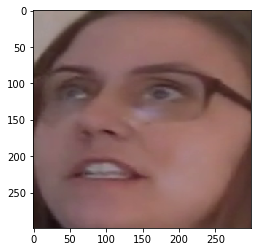

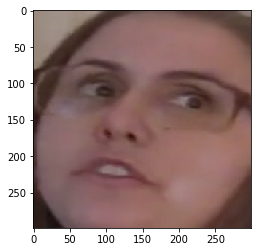

  1%|▏         | 5/400 [00:30<38:52,  5.90s/it]

train_sample_videos/acifjvzvpm.mp4
acifjvzvpm.mp4
300
1


KeyboardInterrupt: 

In [5]:
for path in tqdm(all_train_videos):
    file_name = path.split('/')[-1]
    print(path)
    print(file_name)
    faces = detection_pipeline(path)
    """
    if distances is None:
        continue
    for distance in distances:
        row = [
            file_name,
            distance,
            1 if metadata[file_name]['label'] == 'FAKE' else 0
        ]
        # Append a new row at the end of the data frame
        df.loc[len(df)] = row
    """